# Computer Vision - Maman 22
imports

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


2022-12-04 22:54:42.268201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 22:54:43.028312: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vscode/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-04 22:54:43.028371: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-04 22:54:44.293465: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerr

Constants

Halper Functions

In [4]:
''' Show image in grayscale
'''
def show_gray_image(image):
    plt.imshow(image, cmap='gray')

In [5]:
''' Show image in color
''' 
def show_color_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [6]:
'''  Load image from file 
'''
def load_image(file_name):
    return cv2.imread(file_name, cv2.IMREAD_UNCHANGED)

In [7]:
''' Convert image to grayscale
'''
def convert_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


### Question 1

#### <ins>Q1.a </ins>

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


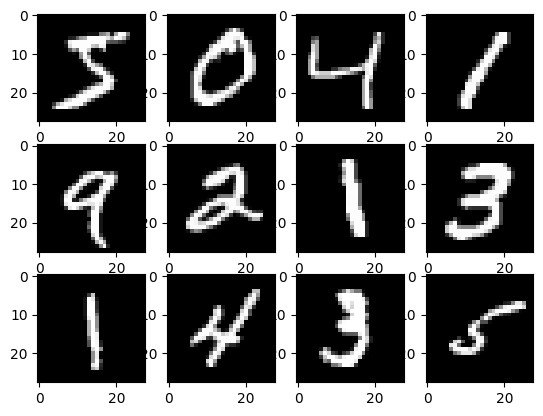

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#printing the shapes of the vectors 
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))
fig = plt.figure()
for i in range(12):  
    plt.subplot(3,4,i+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
nsamples, nx, ny = x_train.shape
d2_train_dataset = x_train.reshape((nsamples,nx*ny))

nsamples_test, nx_test, ny_test = x_test.shape
d2_test_dataset = x_test.reshape((nsamples_test,nx_test*ny_test))

range_k = range(1,10)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(d2_train_dataset, y_train)
   y_pred = classifier.predict(d2_test_dataset)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[ 972    1    1    0    0    2    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  14   13  978    3    1    0    2   16    5    0]
 [   0    3    1  976    1   11    1    8    4    5]
 [   2   11    0    0  936    0    5    1    1   26]
 [   5    0    0    8    2  867    4    1    1    4]
 [   6    4    0    0    3    2  943    0    0    0]
 [   0   27    3    0    1    0    0  986    0   11]
 [   7    4    4   12    6   13    3    8  911    6]
 [   6    7    2   11   10    3    1    9    2  958]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.94      1.00      0.97      1135
           2       0.99      0.95      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.95      0.96       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98      

Text(0, 0.5, 'Accuracy')

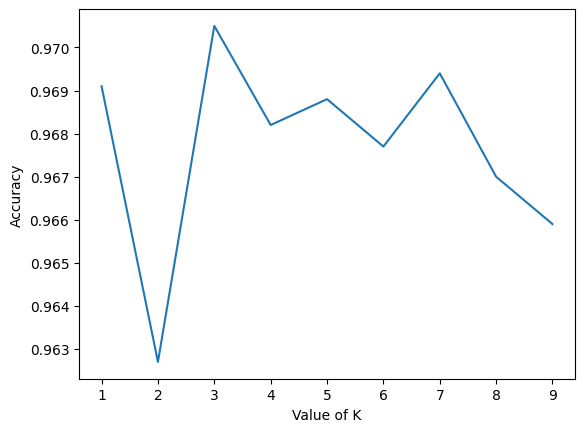

In [10]:
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [11]:
def resahpeImageTo28X28(image):
    return image.reshape([28,28])

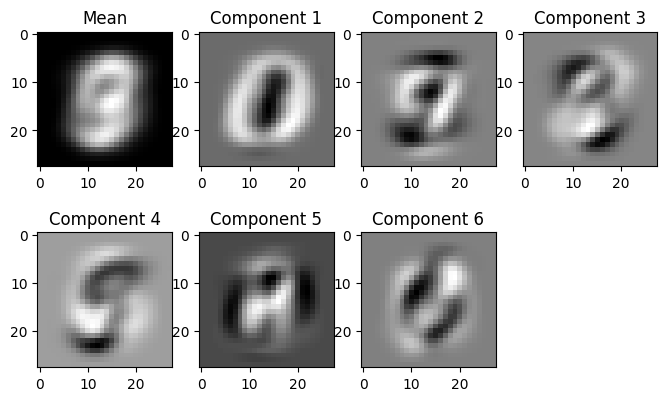

In [13]:
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8,10))
pca = PCA()
principalComponents = pca.fit(d2_train_dataset)
pcaMean = pca.mean_
subplt = plt.subplot(4,4,1)
subplt.title.set_text("Mean")
plt.imshow(resahpeImageTo28X28(pcaMean), cmap="gray")

for i in range(6):
    notReshapedIm = pca.components_[i]
    subplt = plt.subplot(4,4,i+2)
    subplt.title.set_text("Component "+str(i+1))
    plt.imshow(resahpeImageTo28X28(notReshapedIm), cmap="gray")
plt.show()



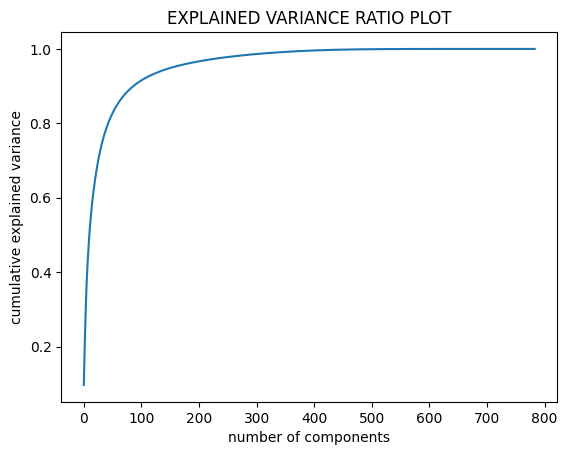

In [14]:
#pca.transform(d2_test_dataset)

cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.title("EXPLAINED VARIANCE RATIO PLOT")
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.plot(cumsum )
plt.show()

In [15]:
def get_num_of_components(percantage : float):
    pca = PCA(percantage)
    pca.fit(d2_train_dataset)
    return pca.n_components_

res = get_num_of_components(0.95)
print("To get " + str(0.95) + "% variance, needed " + str(res) + " components")
res = get_num_of_components(0.8)
print("To get " + str(0.8) + "% variance, needed " + str(res) + " components")


To get 0.95% variance, needed 154 components
To get 0.8% variance, needed 44 components


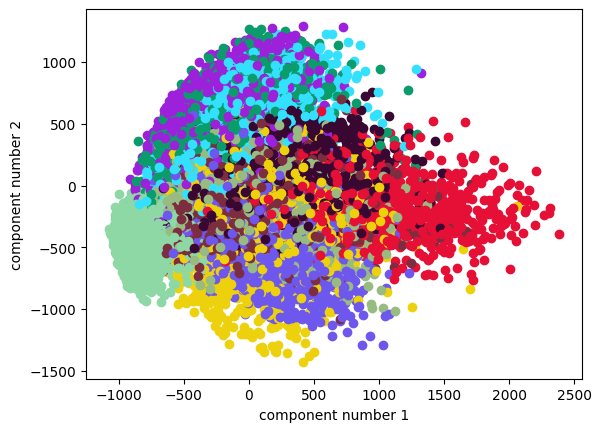

In [18]:
import matplotlib.colors as mcolors
from random import randint

digit_to_color=[]
for i in range(10):
    digit_to_color.append('#%06X' % randint(0, 0xFFFFFF))
pca = PCA(n_components=2) 
x_train_after_fit  = pca.fit(d2_train_dataset)
x_test_after_transform  = pca.transform(d2_test_dataset)
num_Of_x_test = len(x_test_after_transform)
for i in range(num_Of_x_test):
    plt.scatter(x_test_after_transform[i][0], x_test_after_transform[i][1], None, digit_to_color[y_test[i]])
plt.xlabel('component number 1')
plt.ylabel('component number 2')
plt.show()